## Silhouette Evaluation Metric

The **Silhouette Score** is a metric used to evaluate the quality of clustering algorithms. It measures how similar an object is to its own cluster compared to other clusters, providing insight into the separation between clusters.

The score is defined for each sample and ranges between `-1` and `1`:
- A **value close to 1** indicates that the sample is well-clustered (i.e., it is close to the center of its cluster and far from other clusters).
- A **value close to 0** indicates that the sample lies on or near the decision boundary between two clusters.
- A **value close to -1** indicates that the sample may have been assigned to the wrong cluster.

### Silhouette Score Formula

For each point \( i \):
1. **Compute the average intra-cluster distance** \( a(i) \): the average distance between the point and all other points in the same cluster.
2. **Compute the average nearest-cluster distance** \( b(i) \): the average distance between the point and points in the nearest cluster (i.e., the next best cluster to which the point might belong).

The **silhouette score** for point \( i \) is given by:

``` 
S(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
```

### Interpretation:

- \( S(i) \) close to 1 means the point is well separated from neighboring clusters.
- \( S(i) \) close to 0 means the point is on or near the boundary between two clusters.
- \( S(i) \) close to -1 means the point might be misclassified to the wrong cluster.

The overall **silhouette score** for a dataset is the average of the silhouette scores of all points.

### Example:

Imagine we have clustered data into two groups using the **K-Means algorithm**:

- **Cluster 1** contains points `[1, 2, 3, 4, 5]`.
- **Cluster 2** contains points `[10, 11, 12, 13, 14]`.

1. **For a point in Cluster 1** (e.g., point `3`):
   - Compute `a(i)` = average distance between `3` and other points in Cluster 1.
   - Compute `b(i)` = average distance between `3` and points in Cluster 2.
   - Substitute these values into the silhouette formula to get the silhouette score for that point.

2. **For a point in Cluster 2** (e.g., point `12`):
   - Similarly, compute `a(i)` (distance to Cluster 2) and `b(i)` (distance to Cluster 1), and calculate the silhouette score.

### Application in Python (Code Example):

Using `scikit-learn` to compute the Silhouette Score:

```python
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)

# Compute the silhouette score
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score}")
```

### Pros of Silhouette Score:
- Easy to interpret.
- Provides insights into both cohesion and separation of clusters.
- Works well for any type of clustering (e.g., K-Means, hierarchical, etc.).

### Cons of Silhouette Score:
- Not ideal for **clusters with varying densities** or **non-spherical clusters**.
- Can be computationally expensive for large datasets.

### Summary:

The Silhouette Score is a powerful metric to evaluate clustering results by examining how well each point is classified relative to its own cluster and other clusters. It is widely used in machine learning, particularly in unsupervised learning, to assess the effectiveness of a clustering algorithm.

---

## Hierarchical Clustering

Hierarchical Clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. Unlike flat clustering methods such as **K-Means**, hierarchical clustering does not require the user to pre-define the number of clusters. Instead, it creates a tree-like structure of clusters called a **dendrogram**.

Hierarchical clustering comes in two types:
1. **Agglomerative Clustering** (Bottom-Up approach): 
   - Start with each point as its own cluster.
   - Merge the closest pair of clusters step by step until all points belong to a single cluster.
   
2. **Divisive Clustering** (Top-Down approach):
   - Start with all points in one cluster.
   - Recursively split the most heterogeneous clusters until each point is in its own cluster.

The most common approach is **agglomerative hierarchical clustering**.

### Steps of Agglomerative Hierarchical Clustering:

1. **Start with individual clusters**: Treat each data point as a separate cluster (singleton clusters).

2. **Calculate proximity**: Compute the distance (or similarity) between each pair of clusters using a distance metric like **Euclidean distance** or **Manhattan distance**.

3. **Merge clusters**: Find the two closest clusters and merge them into a single cluster.

4. **Repeat**: Continue merging the two nearest clusters at each step until only one cluster remains, which includes all data points.

5. **Build a Dendrogram**: The result of hierarchical clustering can be visualized using a **dendrogram**, which is a tree-like diagram that shows how clusters are merged at each step.

### Example:

Consider the following points in 2D space:
- Point A: (1, 2)
- Point B: (2, 3)
- Point C: (5, 6)
- Point D: (8, 8)

#### Step-by-Step Explanation:
1. **Initialize Clusters**: 
   - A, B, C, and D are each their own cluster.

2. **Calculate Distances**: 
   Compute pairwise distances between the clusters (using Euclidean distance):
   - Distance between A and B: √((2 - 1)² + (3 - 2)²) = √2 ≈ 1.41
   - Distance between A and C: √((5 - 1)² + (6 - 2)²) = √32 ≈ 5.66
   - Distance between B and C: √((5 - 2)² + (6 - 3)²) = √18 ≈ 4.24
   - ... and so on.

3. **Merge Closest Clusters**: 
   A and B are the closest clusters (distance ≈ 1.41), so merge them into a single cluster: **Cluster {A, B}**.

4. **Recompute Distances**: 
   Compute the distances between the new cluster {A, B} and the remaining clusters:
   - Distance between {A, B} and C: Compute the average or single linkage distance, depending on the linkage criterion used.
   - Continue this process until all points are merged into a single cluster.

5. **Dendrogram**: 
   As the merging progresses, a dendrogram is built, which shows at what distance each pair of clusters was merged. The height of the branches represents the distance at which clusters were merged.

### Linkage Methods for Distance Calculation:

Several linkage criteria are used to decide how to calculate the distance between clusters during the merging process:

1. **Single Linkage**: Distance between two clusters is the minimum distance between points in the two clusters.
2. **Complete Linkage**: Distance between two clusters is the maximum distance between points in the two clusters.
3. **Average Linkage**: Distance between two clusters is the average distance between all pairs of points in the two clusters.
4. **Centroid Linkage**: Distance between two clusters is the distance between their centroids.

### Code Example:

You can use **Scikit-learn**'s `AgglomerativeClustering` to perform hierarchical clustering.

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=10, random_state=0)

# Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=2).fit(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='rainbow')
plt.show()

# Create a dendrogram
Z = linkage(X, 'ward')
dendrogram(Z)
plt.show()
```

### Advantages of Hierarchical Clustering:

- **No need to specify the number of clusters** in advance.
- **Dendrogram provides a detailed view** of how clusters are formed and at what level they merge.
- Can be used for **any type of distance metric**, not just Euclidean.

### Disadvantages of Hierarchical Clustering:

- **Computational complexity** is high, especially for large datasets.
- Once a decision is made to merge or split clusters, **it cannot be undone** (no global optimization).
- Sensitive to **noise and outliers**.

### Stopping Criteria:

The algorithm can be stopped when a predefined number of clusters are obtained, or you can cut the dendrogram at a desired level to get the clusters.

### Example Use Cases:

- **Hierarchical clustering** is widely used in **taxonomy**, **biology**, and **genomics** (e.g., organizing species or genes into hierarchical categories).
- It is useful for **market segmentation**, **document classification**, and other domains where the hierarchy of clusters is meaningful.

### Summary:

Hierarchical clustering is a powerful tool for grouping data into a hierarchy of clusters. It differs from flat clustering algorithms in that it provides a tree-based view of how clusters are formed, which can be especially useful when the number of clusters is not known beforehand.

---

**Import of required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**Records of the given dataset**

unzipped data from 'Day_18/data.csv.zip' and use


In [2]:
data = pd.read_csv("../Day_18_1/data.csv", delimiter=',', encoding = "ISO-8859-1")
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


**Information of the columns in a data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Description of numeric features**

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


**Description of non numeric features**

In [6]:
data.describe(exclude=['int64', 'float64']).T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


**Check for null values**

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Shape of the available data**

In [8]:
data.shape

(541909, 8)

**Delete all the missing records**

In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(406829, 8)

In [11]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Checking of whether negative values present in Quantity and Unit Price**

In [12]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [13]:
data[data['UnitPrice']<0].shape[0]

0

**Drop the negative values or quantity**

In [14]:
data.drop(data[data['Quantity'] < 0].index, inplace=True)

In [15]:
data.shape

(397924, 8)

**Calculation of total amount or monetary value**

In [16]:
data['Sales'] = data['Quantity'] * data['UnitPrice']
new_data = data.groupby('CustomerID')['Sales'].sum().reset_index()
new_data

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [17]:
type(new_data)

pandas.core.frame.DataFrame

**Calculating the number of transactions of each customer**

In [18]:
num_trans = data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_trans

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [19]:
type(num_trans)

pandas.core.frame.DataFrame

**Calculate Last Transaction**

In [20]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [21]:
data['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397924, dtype: datetime64[ns]

In [22]:
data['Last Transaction'] = (data['InvoiceDate'].max() - data['InvoiceDate']).dt.days

In [23]:
data['Last Transaction']

0         373
1         373
2         373
3         373
4         373
         ... 
541904      0
541905      0
541906      0
541907      0
541908      0
Name: Last Transaction, Length: 397924, dtype: int64

In [24]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Last Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,373
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,373
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,373


In [25]:
lt = data.groupby(['CustomerID','Country'])['Last Transaction'].max().reset_index()

In [26]:
lt

,CustomerID,Country,Last Transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4342,18280.0,United Kingdom,277
4343,18281.0,United Kingdom,180
4344,18282.0,United Kingdom,125
4345,18283.0,United Kingdom,336


In [27]:
merge_table = pd.merge(lt, num_trans, how='inner', on='CustomerID')
new_df = pd.merge(merge_table, new_data, how='inner', on='CustomerID')
new_df

,CustomerID,Country,Last Transaction,InvoiceNo,Sales
0,12346.0,United Kingdom,325,1,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,80.82
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,756,2094.88


**Removal of Outliers using boxplot**

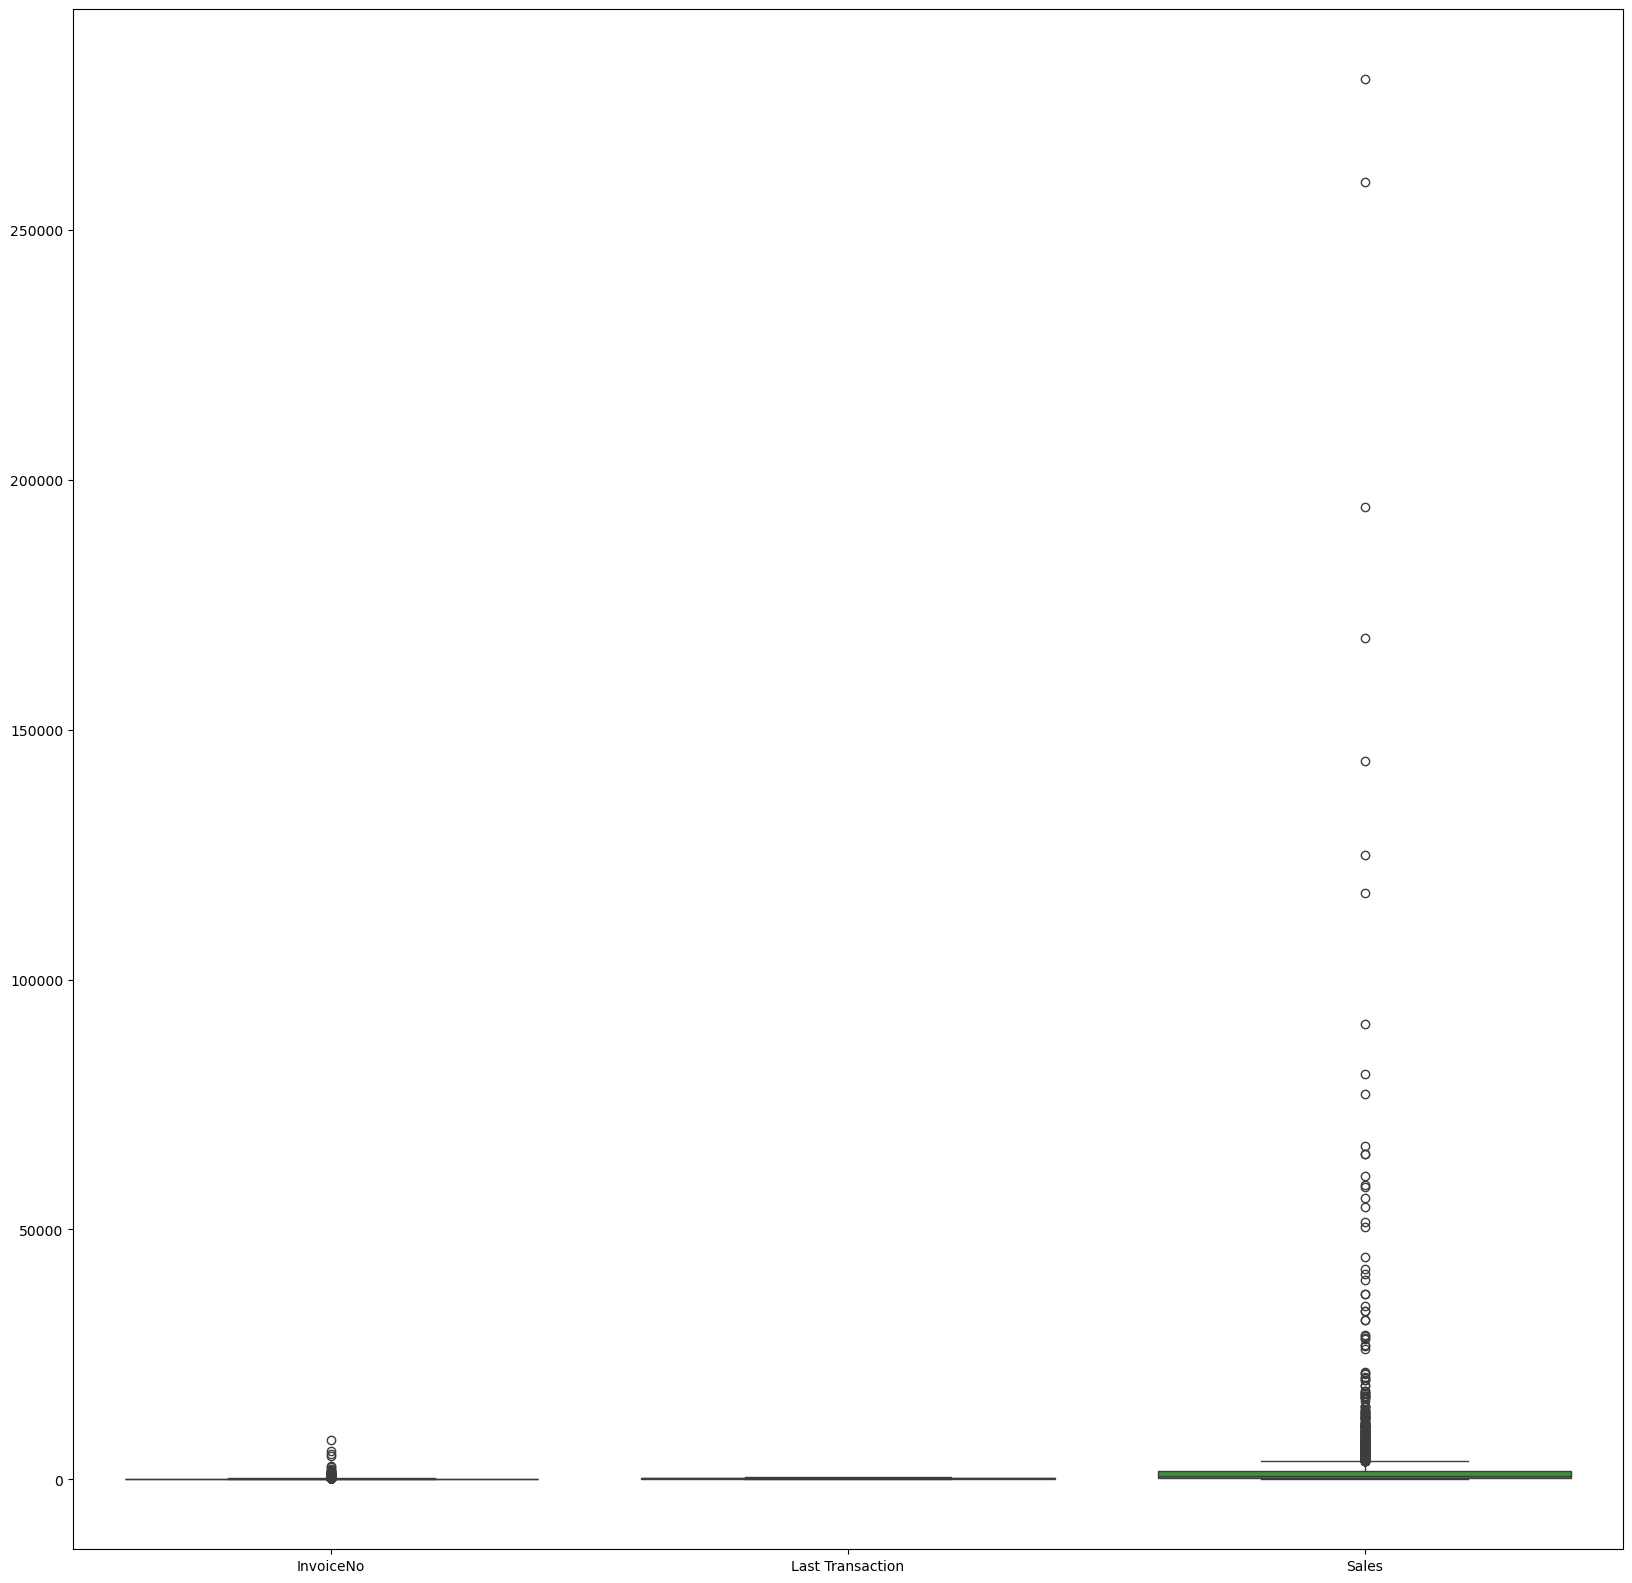

In [28]:
plt.figure(figsize=(20,20))
sns.boxplot(data = new_df[['InvoiceNo', 'Last Transaction', 'Sales']])
plt.show()

In [29]:
IQR = new_df['Sales'].quantile(0.75) - new_df['Sales'].quantile(0.25)
lower_limit = new_df['Sales'].quantile(0.25) - 1.5*IQR
upper_limit = new_df['Sales'].quantile(0.75) + 1.5*IQR
new_df_iqr = new_df[(new_df['Sales'] < upper_limit) & (new_df['Sales']>lower_limit)]
new_df_iqr.shape

(3923, 5)

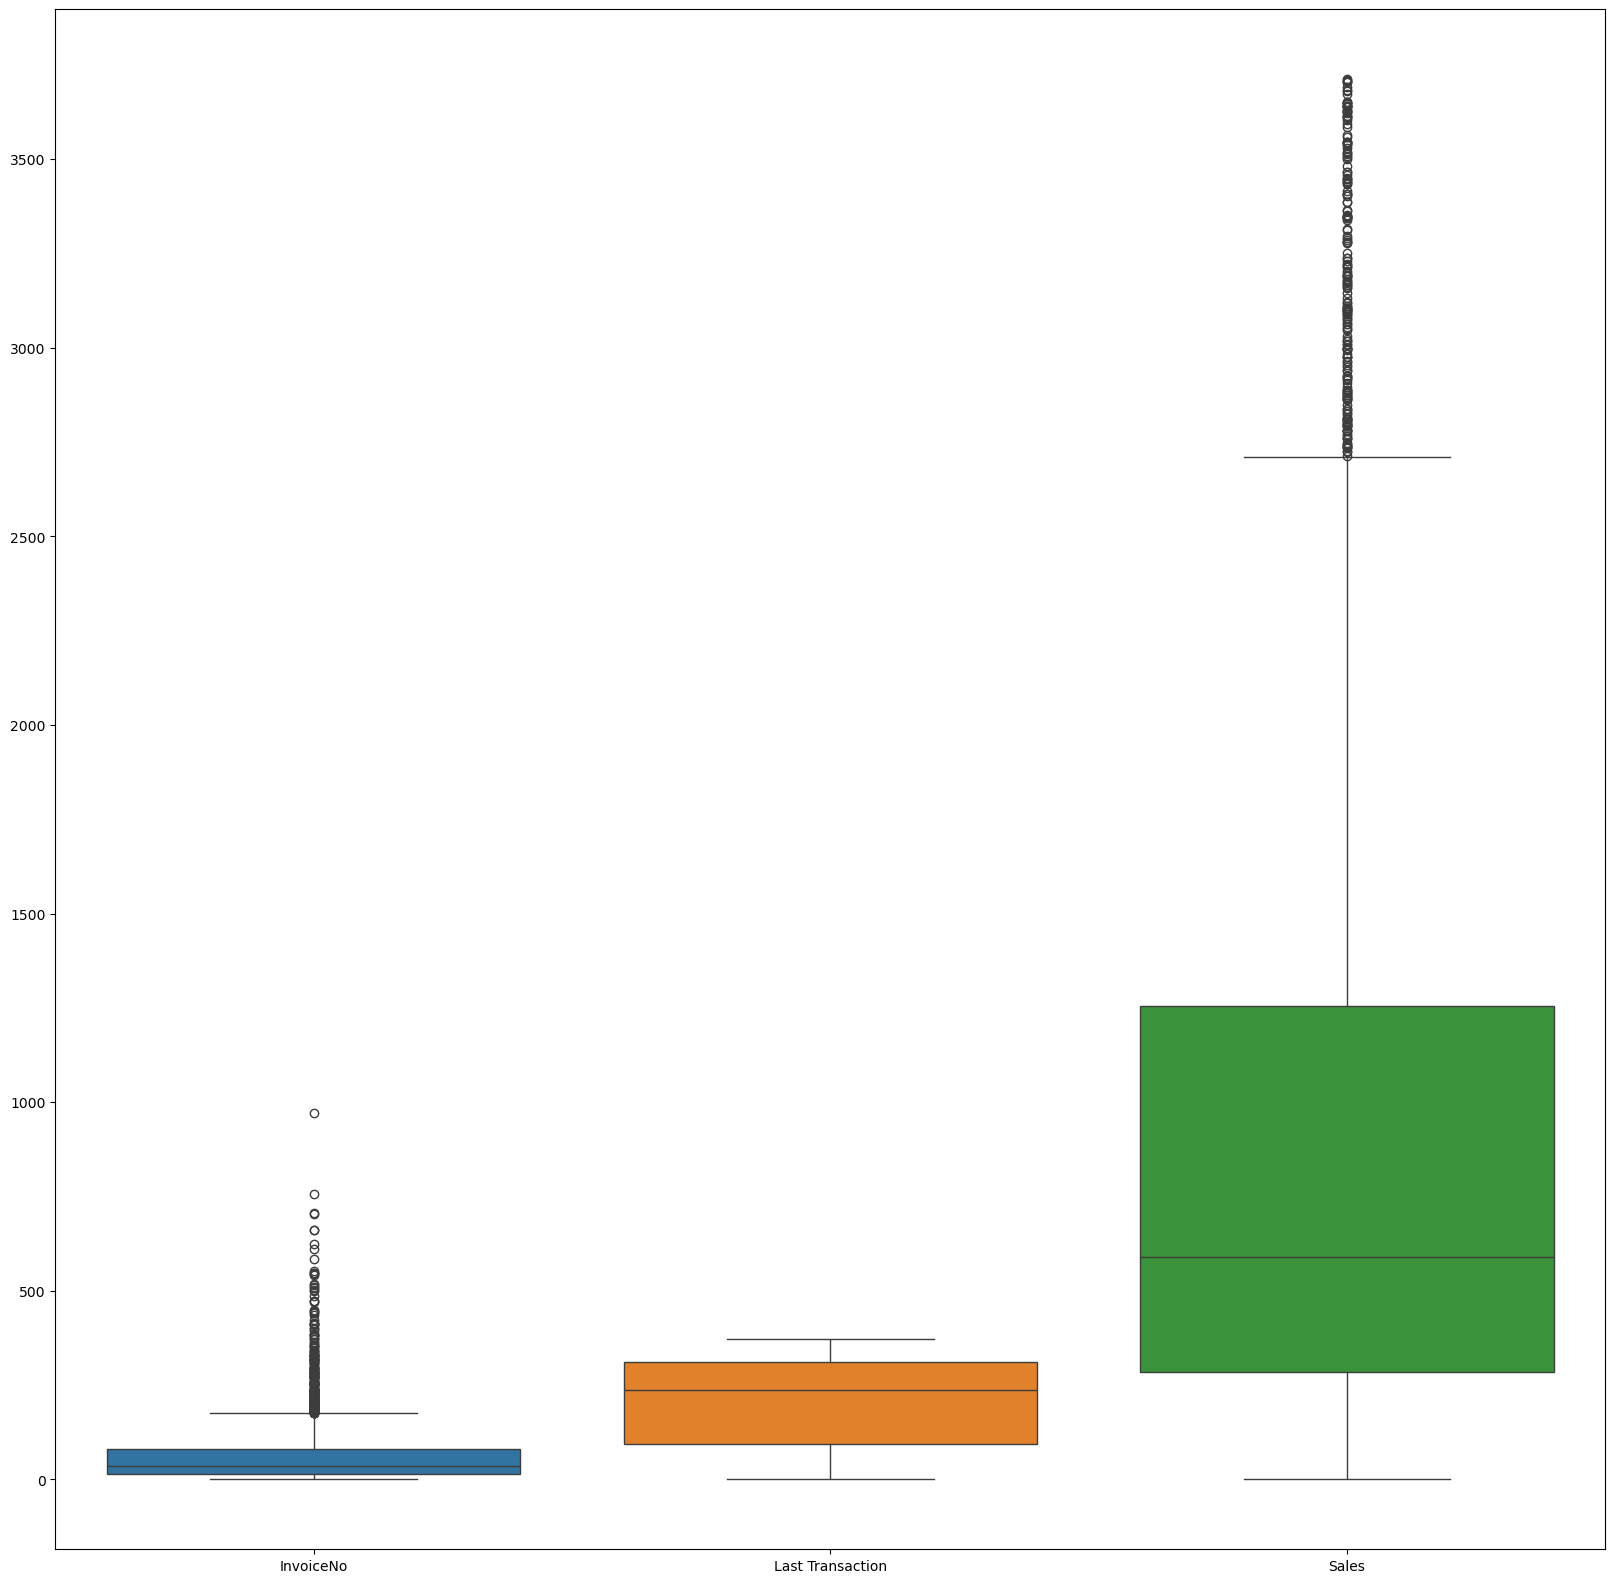

In [30]:
plt.figure(figsize=(20,20))
sns.boxplot(data = new_df_iqr[['InvoiceNo', 'Last Transaction', 'Sales']])
plt.show()

In [31]:
new_df_iqr.reset_index(drop=True, inplace=True)
new_df_iqr

,CustomerID,Country,Last Transaction,InvoiceNo,Sales
0,12348.0,Finland,357,31,1797.24
1,12349.0,Italy,18,73,1757.55
2,12350.0,Norway,309,17,334.40
3,12352.0,Norway,296,85,2506.04
4,12353.0,Bahrain,203,4,89.00
...,...,...,...,...,...
3918,18280.0,United Kingdom,277,10,180.60
3919,18281.0,United Kingdom,180,7,80.82
3920,18282.0,United Kingdom,125,12,178.05
3921,18283.0,United Kingdom,336,756,2094.88


**Visualization of correlation matrix using heatmap**

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df_iqr.corr(),cmap="Greens", annot=True)
plt.show()

**Normalization of given dataset using MinMaxScaler**

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
new2_df= new_df_iqr[['Last Transaction','InvoiceNo','Sales']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new2_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = ['Last Transaction','InvoiceNo','Sales']
scaled_df['Country'] = new_df_iqr['Country']
scaled_df

,Last Transaction,InvoiceNo,Sales,Country
0,0.957105,0.030960,0.484200,Finland
1,0.048257,0.074303,0.473507,Italy
2,0.828418,0.016512,0.090092,Norway
3,0.793566,0.086687,0.675160,Norway
4,0.544236,0.003096,0.023978,Bahrain
...,...,...,...,...
3918,0.742627,0.009288,0.048656,United Kingdom
3919,0.482574,0.006192,0.021774,United Kingdom
3920,0.335121,0.011352,0.047969,United Kingdom
3921,0.900804,0.779154,0.564388,United Kingdom


**K Means Clustering - Plot the graph using elbow method**

In [47]:
# !conda install -c districtdatalabs yellowbrick

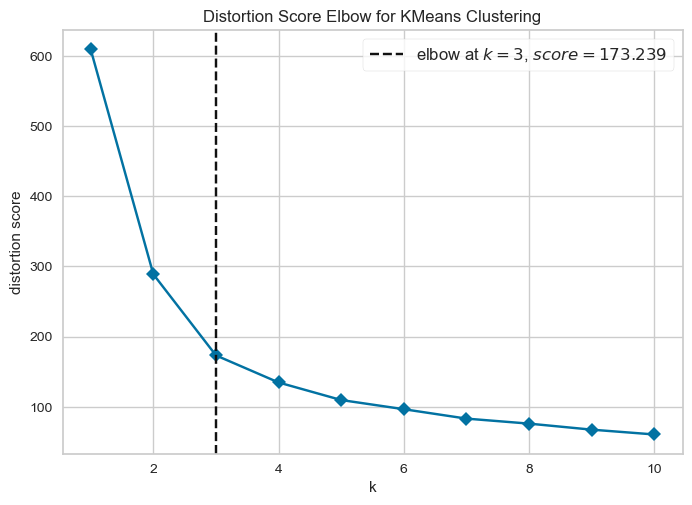

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_k)        # Fit data to visualizer
visualizer.show()

In [49]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_k)
df_k['clusters']= y_predicted
df_k

,Last Transaction,InvoiceNo,Sales,clusters
0,0.957105,0.030960,0.484200,1
1,0.048257,0.074303,0.473507,2
2,0.828418,0.016512,0.090092,0
3,0.793566,0.086687,0.675160,1
4,0.544236,0.003096,0.023978,0
...,...,...,...,...
3918,0.742627,0.009288,0.048656,0
3919,0.482574,0.006192,0.021774,2
3920,0.335121,0.011352,0.047969,2
3921,0.900804,0.779154,0.564388,1


In [50]:
km.cluster_centers_

array([[0.77524523, 0.04278968, 0.15767036],
       [0.79866329, 0.15828573, 0.63390963],
       [0.21947656, 0.04005929, 0.14858853]])

**Model Evaluation**

In [51]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, km.labels_, metric='euclidean')
print(score)

0.7831613755890837


In [52]:
from sklearn.cluster import AgglomerativeClustering
hierarchial = AgglomerativeClustering(n_clusters=3)
y_predicted_hierarchial = km.fit_predict(df_k)
df_k['clusters_hierarchial']= y_predicted_hierarchial
df_k

,Last Transaction,InvoiceNo,Sales,clusters,clusters_hierarchial
0,0.957105,0.030960,0.484200,1,0
1,0.048257,0.074303,0.473507,2,1
2,0.828418,0.016512,0.090092,0,2
3,0.793566,0.086687,0.675160,1,0
4,0.544236,0.003096,0.023978,0,2
...,...,...,...,...,...
3918,0.742627,0.009288,0.048656,0,2
3919,0.482574,0.006192,0.021774,2,1
3920,0.335121,0.011352,0.047969,2,1
3921,0.900804,0.779154,0.564388,1,0


In [53]:
from sklearn.cluster import AgglomerativeClustering
hierarchial = AgglomerativeClustering(n_clusters=2)
y_predicted_hierarchial = km.fit_predict(df_k)
df_k['clusters_hierarchial']= y_predicted_hierarchial
df_k.head(30)

,Last Transaction,InvoiceNo,Sales,clusters,clusters_hierarchial
0,0.957105,0.030960,0.484200,1,2
1,0.048257,0.074303,0.473507,2,0
2,0.828418,0.016512,0.090092,0,1
3,0.793566,0.086687,0.675160,1,2
4,0.544236,0.003096,0.023978,0,1
5,0.619303,0.058824,0.290805,0,1
6,0.571046,0.012384,0.123768,0,1
7,0.871314,0.059856,0.757436,1,2
8,0.402145,0.018576,0.314691,2,0
9,0.536193,0.132095,0.717194,1,2


In [54]:
from sklearn.cluster import AgglomerativeClustering
hierarchial = AgglomerativeClustering(n_clusters=3)
y_predicted_hierarchial = km.fit_predict(df_k)
df_k['clusters_hierarchial']= y_predicted_hierarchial
df_k.head(30)

,Last Transaction,InvoiceNo,Sales,clusters,clusters_hierarchial
0,0.957105,0.030960,0.484200,1,0
1,0.048257,0.074303,0.473507,2,1
2,0.828418,0.016512,0.090092,0,2
3,0.793566,0.086687,0.675160,1,0
4,0.544236,0.003096,0.023978,0,2
5,0.619303,0.058824,0.290805,0,2
6,0.571046,0.012384,0.123768,0,2
7,0.871314,0.059856,0.757436,1,0
8,0.402145,0.018576,0.314691,2,1
9,0.536193,0.132095,0.717194,1,0
